<a href="https://colab.research.google.com/github/sota1111/ML_basic/blob/main/ML_basic_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install numpy matplotlib ipython scikit-learn pandas pillow mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 7.3 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=0ef25a82edfff2278539e158c5709153d2eb9293adca6d080d1b074193f1198b
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

# 3.1 教師なし学習の種類

教師なし変換：元のデータ表現を変換して、人間や他の機械学習アルゴリズムにとって、より分かりやすい新しいデータ表現を作るアルゴリズム  
利用法：
* 次元削減が一般的。高次元表現を入力として、少量の本質的な特徴を表す。  
* そのデータを構成する部品、もしくは成分を見つける。例．文書のトピック抽出
* クラスタリングアルゴリズム：データを似たような要素から構成されるグループに分ける

# 3.2 教師なし学習の難しさ

アルゴリズムが学習したことの有用性の評価が難しい。  
ラベルがないため、アルゴリズムに求めているものを教えることができない。  
活用方法
- データサイエンティストがデータを理解するために探索的に用いる。
- 教師あり学習の前処理アルゴリズムとして用いる。

# 3.3 前処理とスケール変換

特徴量ごとにスケールを変換してずらす

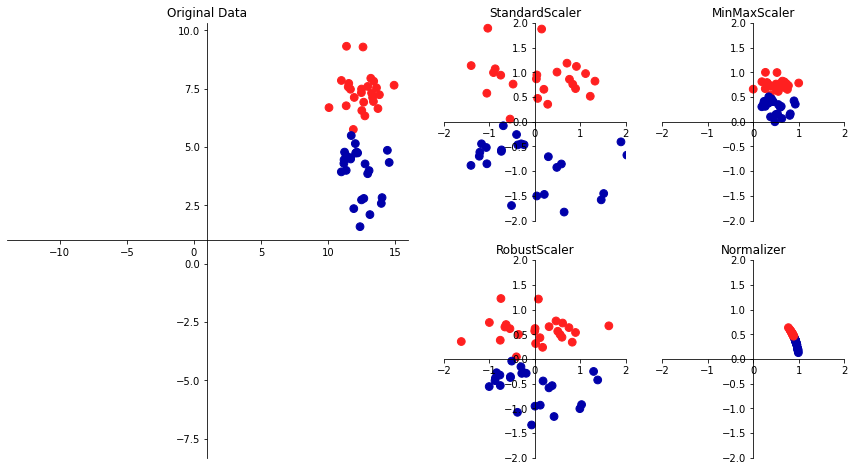

In [4]:
mglearn.plots.plot_scaling()

## 3.3.1 さまざまな前処理

上記グラフはデータを標準的なレンジに変換する4つの方法
- StandardScaler：ここの特徴量の平均が０で分散が１になるように変換。最大値や最小値がある範囲に入ることを保証しない。
- RobustScaler：ここの特徴量の最大値や最小値がある範囲に入るように変換。極端に他の値と異なる値は無視する。
- MinMaxScaler：データが０〜1になるように変換する。
- Normalizer：個々のデータポイントを特徴量ベクトルがユークリッド長１になるように変換する。つまり、半径１の円に投射する。したがって、全てのデータポイントに対してそれぞれ異なるスケール変換を行う。この変換はベクトルの長さではなく、方法だけが問題になる場合に用いられる。

## 3.3.2 データ変換の適用

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# 教師なし学習はX_trainのみを与える
scaler.fit(X_train)

MinMaxScaler()

In [7]:
# データを変換
X_train_scaled = scaler.transform(X_train)
# スケール変換の前後のデータ特性をプリント
print("transformed shape: {}".format(X_train_scaled))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(X_train_scaled.max(axis=0)))

transformed shape: [[0.389938   0.70713561 0.4119273  ... 0.80962199 0.59957224 0.91755006]
 [0.37763264 0.31755157 0.36790823 ... 0.51168385 0.33174905 0.31598672]
 [0.36438071 0.35238417 0.35208348 ... 0.55292096 0.3476711  0.28857479]
 ...
 [0.48364807 0.50084545 0.48655933 ... 0.65257732 0.4151616  0.84259557]
 [0.3336173  0.3902604  0.31787713 ... 0.27364261 0.15684411 0.22443516]
 [0.28628899 0.29455529 0.26826066 ... 0.17226804 0.10004753 0.06938644]]
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.35

In [8]:
# テストデータを変換
X_test_scaled = scaler.transform(X_test)
# スケール変換の前後のデータ特性をプリント
print("per-feature minimum after scaling:\n {}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


trainで学習させたため、MinMaxが0,1になっていない。

## 3.3.3 訓練データとテストデータを同じように変換する

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

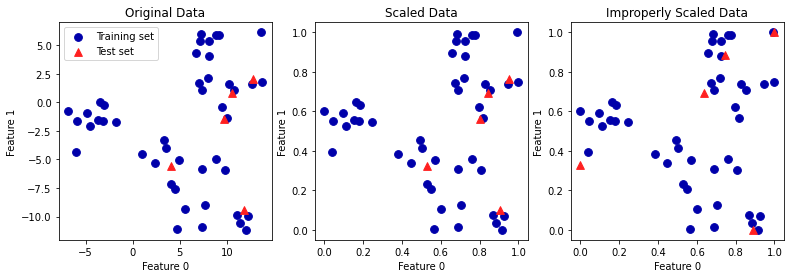

In [9]:
from sklearn.datasets import make_blobs
# 合成データを作成
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# 訓練セットとデータセットに分割
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# 訓練セットとテストセットをプロット
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:,0], X_train[:,1], c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:,0], X_test[:,1], marker='^', c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# MinMaxScalerでデータをスケール変換
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# スケール変換されたデータの特性を可視化
axes[1].scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:,0], X_test_scaled[:,1], marker='^', c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

# テストセットを訓練セットとは別にスケール変換
# 最小値と最大値が0, 1になる。ここでは説明のためにわざとやっている
# *実際にはやってはいかない！*
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 間違ってスケール変換されたデータを可視化
axes[2].scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=mglearn.cm2(0), label="Training set", s=60)
axes[2].scatter(X_test_scaled_badly[:,0], X_test_scaled_badly[:,1], marker='^', c=mglearn.cm2(1), label="Test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
  ax.set_xlabel("Feature 0")
  ax.set_ylabel("Feature 1")

## 3.3.4 教師あり学習における前処理の効果

In [10]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.94


In [11]:
# 0-1スケール変換で前処理
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 訓練された訓練データで学習
svm.fit(X_train_scaled, y_train)

# 変換されたテストセットでスコア計算
print("Scaled test set accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


In [12]:
# 平均を0に分散を1に前処理
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 変換された訓練データで学習
svm.fit(X_train_scaled, y_train)

# 変換されたテストセットでスコア計算
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


# 3.4 次元削減、特徴量抽出、多様体学習

## 3.4.1 主成分分析（PCA)

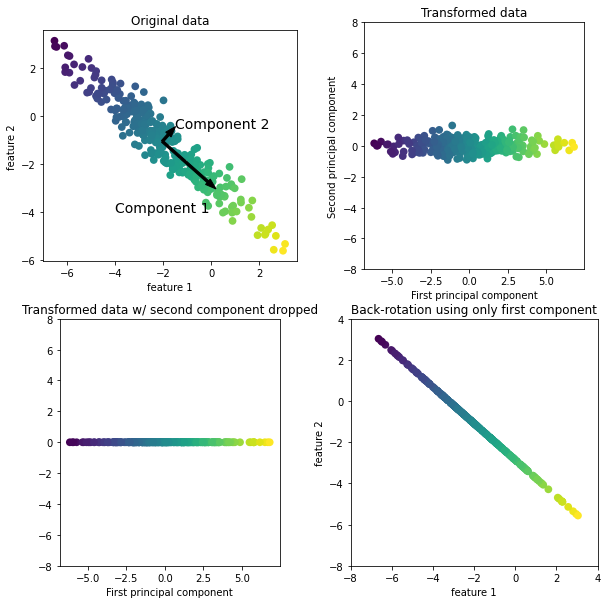

In [13]:
mglearn.plots.plot_pca_illustration()

1つ目のグラフ：元データ  
2つ目のグラフ：最も分散が大きい成分をx軸にし、０を原点。
これを主成分と呼ぶ。  
3つ目のグラフ：主成分以外のデータを消す。  
4つ目のグラフ：元の回転方向に戻す。

### 3.4.1.1 cancerデータセットのPCAによる可視化

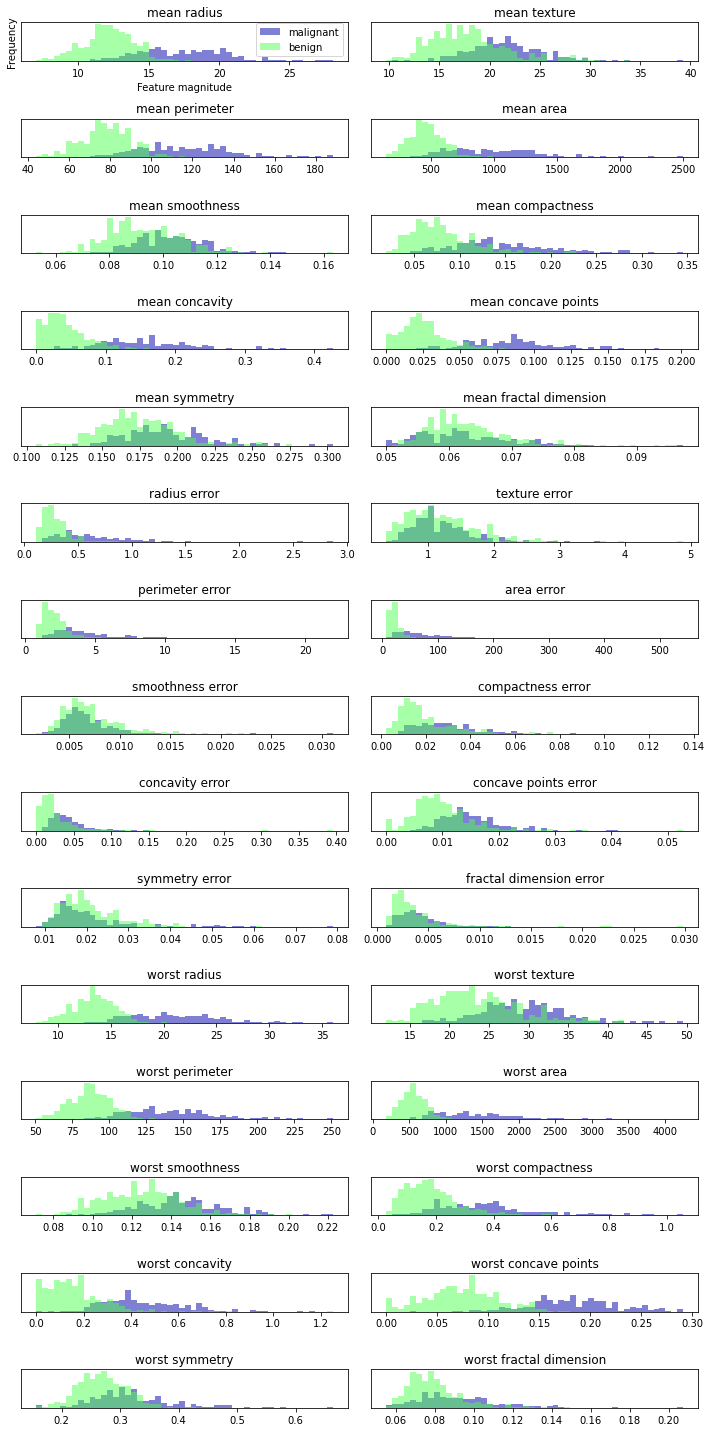

In [14]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()
for i in range(30):
  _, bins = np.histogram(cancer.data[:, i], bins=50)
  ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
  ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
  ax[i].set_title(cancer.feature_names[i])
  ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

In [15]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [16]:
from sklearn.decomposition import PCA
# データの最初の2つの主成分だけを維持する
pca = PCA(n_components=2)
# cancerデータセットにPCAモデルを適合
pca.fit(X_scaled)

# 最初の二つの主成分に対してデータポイントを変換
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0, 0.5, 'Second principal component')

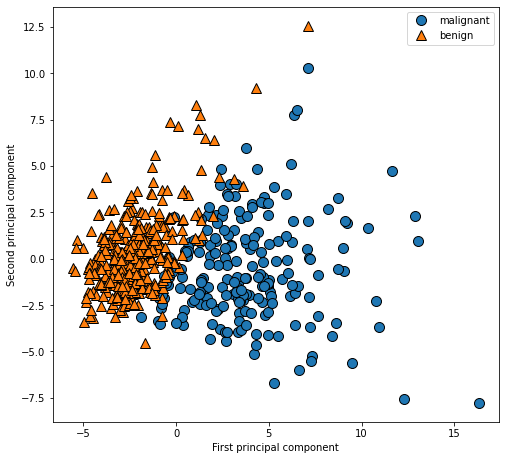

In [17]:
# 第一主成分と第二主成分によるプロット。クラスごとに色分け
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [18]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


In [19]:
print("PCA component:\n{}",format(pca.components_))

PCA component:
{} [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal components')

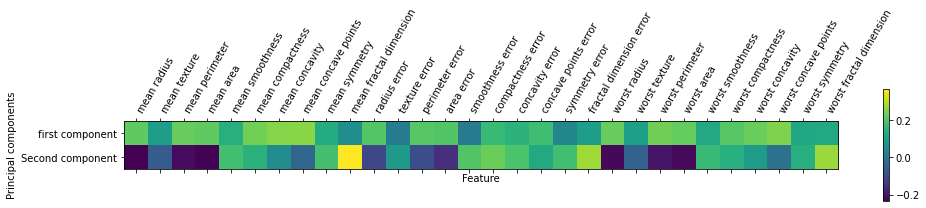

In [20]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["first component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

### 3.4.1.2 固有顔による特徴量抽出

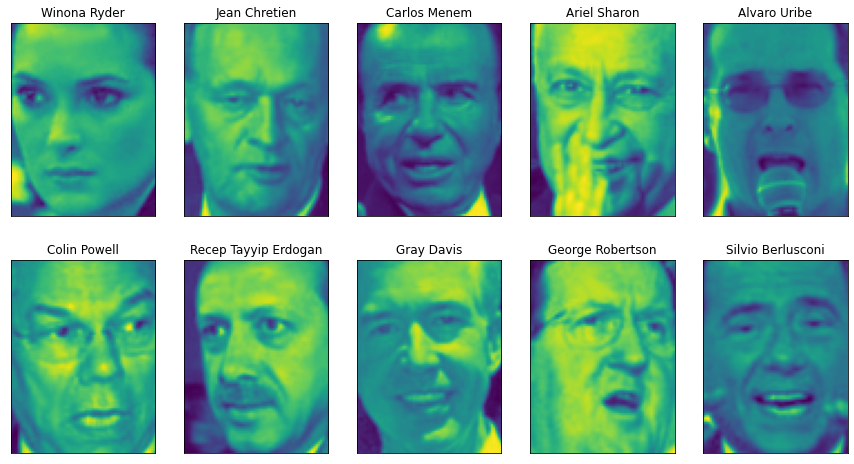

In [21]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
  ax.imshow(image)
  ax.set_title(people.target_names[target])

In [22]:
print("people.image.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.image.shape: (3023, 87, 65)
Number of classes: 62


In [23]:
# 各ターゲットの出現回数をカウント
counts = np.bincount(people.target)
# ターゲット目と出現回数を並べて表示
for i, (count, name) in enumerate(zip(counts, people.target_names)):
  print("{0:25}{1:3}".format(name, count), end='    ')
  if (i + 1) % 3 == 0:
    print()

Alejandro Toledo          39    Alvaro Uribe              35    Amelie Mauresmo           21    
Andre Agassi              36    Angelina Jolie            20    Ariel Sharon              77    
Arnold Schwarzenegger     42    Atal Bihari Vajpayee      24    Bill Clinton              29    
Carlos Menem              21    Colin Powell             236    David Beckham             31    
Donald Rumsfeld          121    George Robertson          22    George W Bush            530    
Gerhard Schroeder        109    Gloria Macapagal Arroyo   44    Gray Davis                26    
Guillermo Coria           30    Hamid Karzai              22    Hans Blix                 39    
Hugo Chavez               71    Igor Ivanov               20    Jack Straw                28    
Jacques Chirac            52    Jean Chretien             55    Jennifer Aniston          21    
Jennifer Capriati         42    Jennifer Lopez            21    Jeremy Greenstock         24    
Jiang Zemin               20  

各人の画像を50に制限する

In [24]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
  mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]

# 0から255で表現されている、グレースケールの値０と１の間に変換
# こうした方が数値的に安定する
X_people = X_people / 255.

from sklearn.neighbors import KNeighborsClassifier
# 訓練セットとテストセットにデータを分割
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
# KNeighborsClassifierを1-最近傍で構築
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of -1-nn: {:.2f}".format(knn.score(X_test, y_test)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


Test set score of -1-nn: 0.23


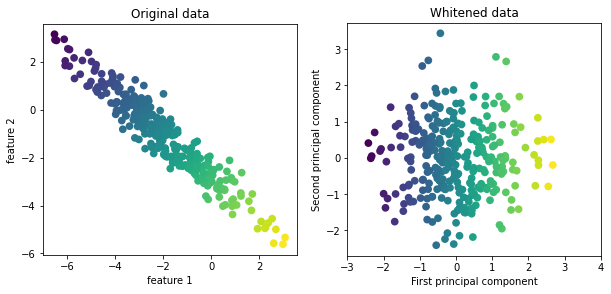

In [25]:
mglearn.plots.plot_pca_whitening()

In [26]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


In [27]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.31


In [28]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


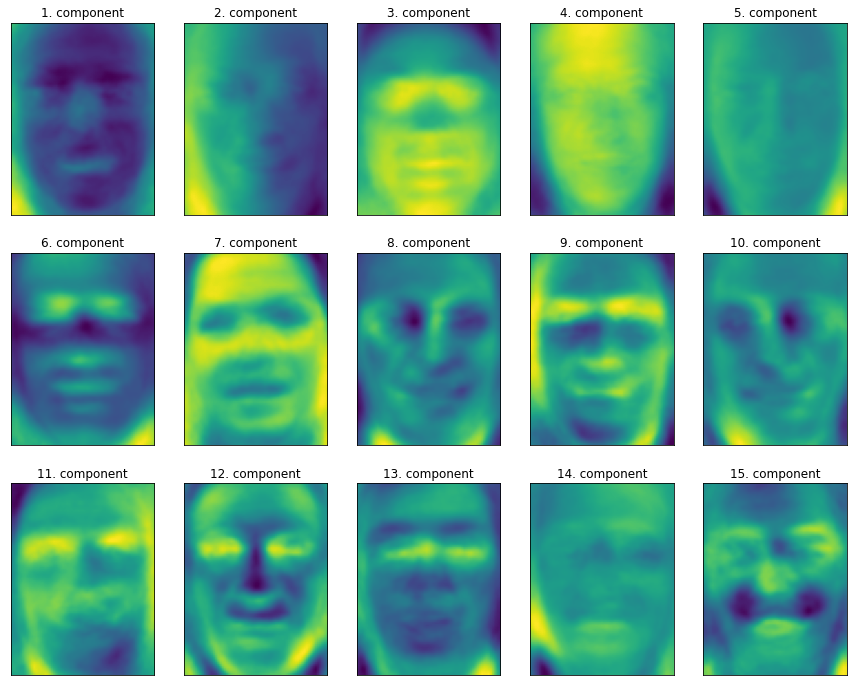

In [29]:
fix, axes = plt.subplots(3, 5, figsize=(15,12),subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
  ax.imshow(component.reshape(image_shape), cmap='viridis')
  ax.set_title("{}. component".format((i+1)))

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))
________________________________________________________pca_faces - 4.8s, 0.1min


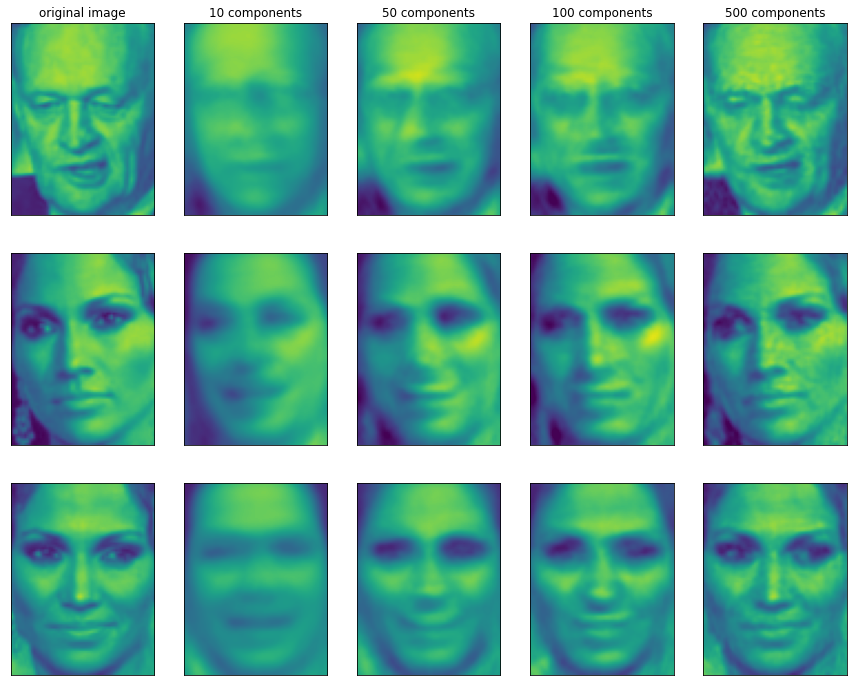

In [30]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0, 0.5, 'Second principal component')

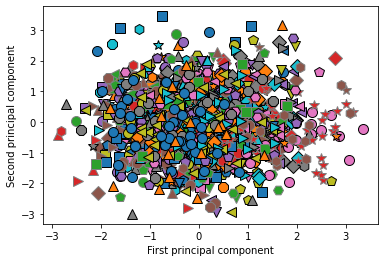

In [31]:
mglearn.discrete_scatter(X_train_pca[:,0], X_train_pca[:,1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

## 3.4.2 非負値行列因子分解（NMF)

NMF：有用な特徴量を抽出することを目的とする教師なし学習学習手法。PCAと同様に個々のデータポイントをいくつかの成分の重み付き和として表現したい。  
PCAでは個々の成分はデータの分散を可能な限り互いに直行の必要あり  
NMFでは係数と成分が非負であること、つまり、成分とその係数が常にゼロ以上であることが求められる。  
いくつもの独立した発生源から得られたデータを重ね合わせて作られるようなデータに有効。複数の人が話している音声データ。

### 3.4.2.1 NMFの合成データへの適用

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


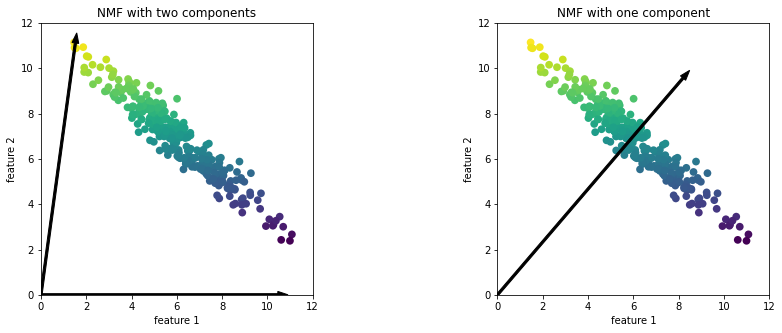

In [32]:
mglearn.plots.plot_nmf_illustration()

左のグラフ：明らかに全てのデータが2つの成分の正係数の重み付き和で表現できる。  
右のグラフ：1つしか成分を使わない場合は平均に向かう成分を作る。

### 3.4.2.2 NMFの顔画像への適用

In [33]:
# mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


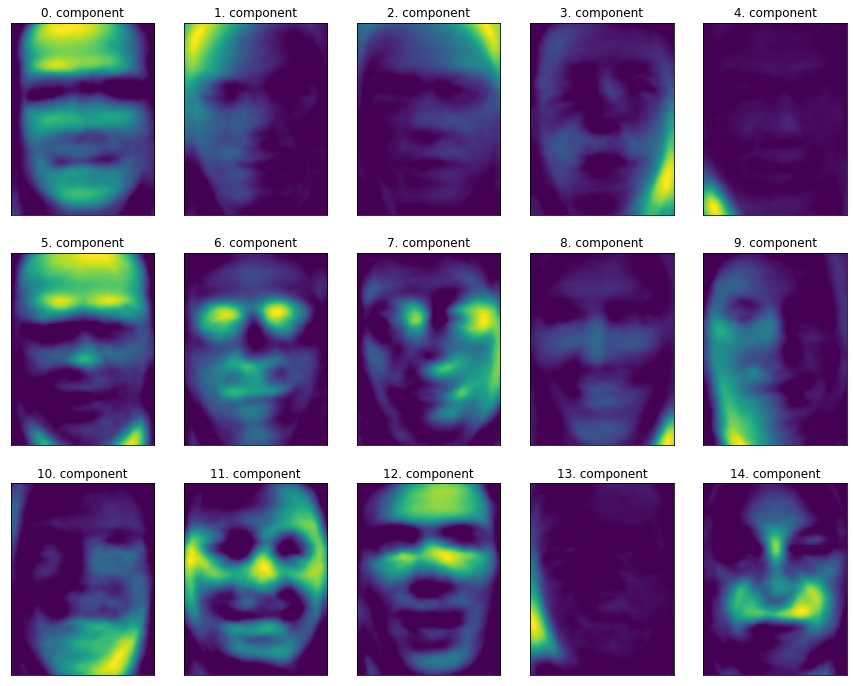

In [34]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
  ax.imshow(component.reshape(image_shape))
  ax.set_title("{}. component".format(i))

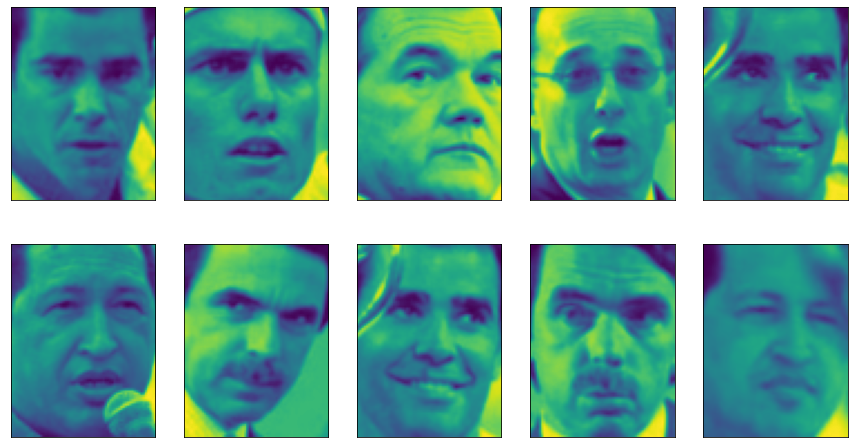

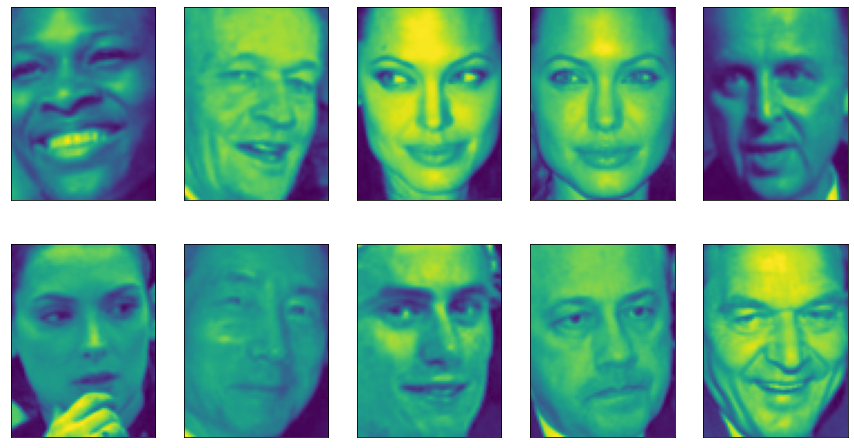

In [35]:
compn = 3
# 3つ目の成分でソート、最初の１０画像を表示。右向きの画像が多くなる
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
  ax.imshow(X_train[ind].reshape(image_shape))

copmn = 7
# 7つ目の成分でソート、最初の１０画像を表示。左向きの画像が多くなる
inds = np.argsort(X_train_nmf[:, compn])[::1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
  ax.imshow(X_train[ind].reshape(image_shape))

Text(0, 0.5, 'Signal')

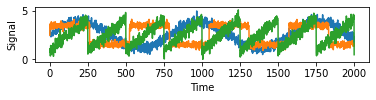

In [36]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

3つの信号が混ざったものだけが観測できるとする

In [37]:
# データを混ぜて100次元の状態を作る
A = np.random.RandomState(0).uniform(size=(100,3))
X = np.dot(S, A.T)
print("Shape of measurements: {}".format(X.shape))

Shape of measurements: (2000, 100)


In [38]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("Recovered signal shape: {}".format(S_.shape))

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


Recovered signal shape: (2000, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


In [39]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

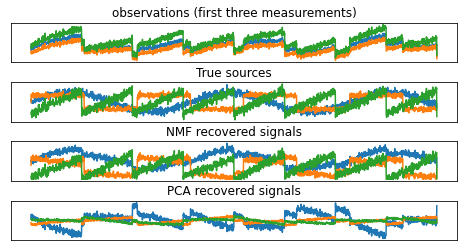

In [40]:
models = [X, S, S_, H]
names = ['observations (first three measurements)',
         'True sources',
         'NMF recovered signals',
         'PCA recovered signals']

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5}, subplot_kw={'xticks': (), 'yticks': ()})
for model, name, ax in zip(models, names, axes):
  ax.set_title(name)
  ax.plot(model[:, :3], '-')

## t-SNEを用いた多様体学習

多様体学習：何言ってるか全然理解できないorz

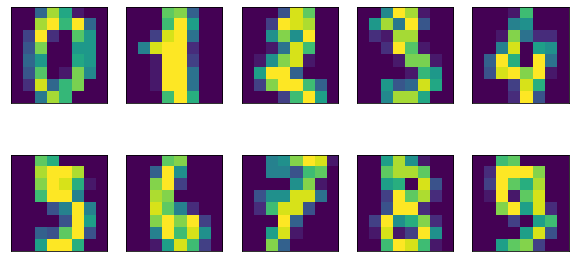

In [41]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2 ,5, figsize=(10,5), subplot_kw={'xticks':(), 'yticks':()})
for ax, img in zip(axes.ravel(), digits.images):
  ax.imshow(img)

Text(0, 0.5, 'Second principal component')

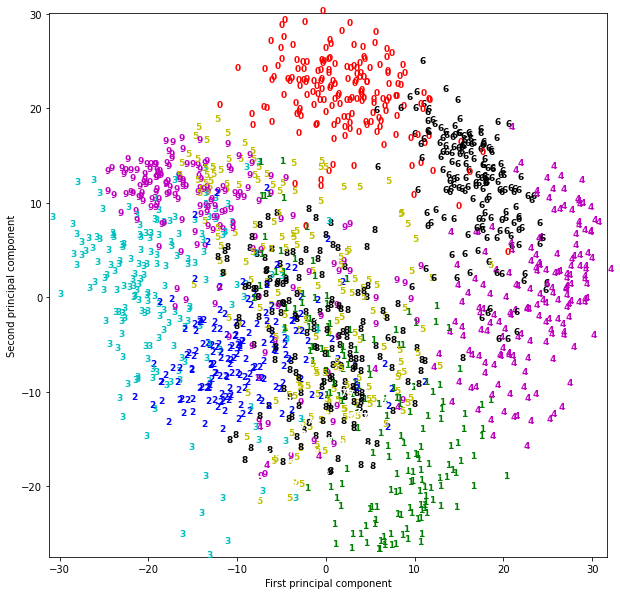

In [42]:
# PCAモデルを構築
pca = PCA(n_components=2)
pca.fit(digits.data)
# 数値データを最初の２主成分で変形
digits_pca = pca.transform(digits.data)
colors = ["r", "g", "b", "c", "m", "y", "k", "w",'k', 'm']
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
  # 散布図を数字でプロット
  plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
           color=colors[digits.target[i]],
           fontdict={'weight':'bold', 'size':9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Text(0.5, 0, 't-SNE feature 1')

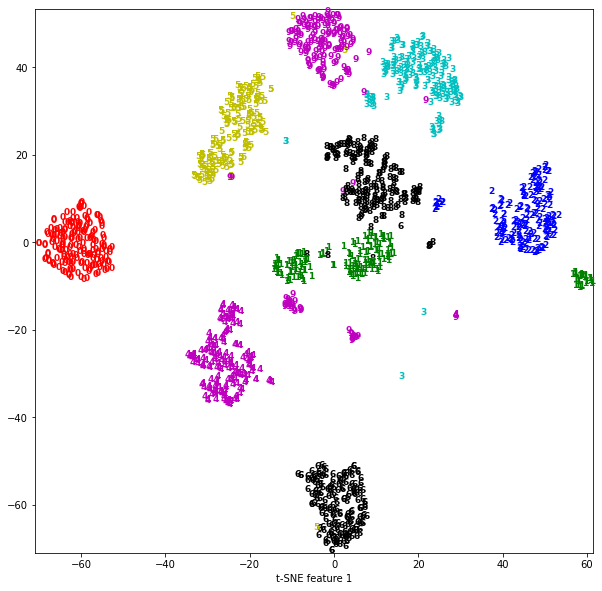

In [43]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# fitではなくfit_transformを用いる。TSNEにはtransformメソッドがない
digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max()+1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max()+1)
for i in range(len(digits.data)):
  # 点ではなく数字をテキストとしてプロットする
  plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
           color = colors[digits.target[i]],
           fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1")

# 3.5 クラスタリング

クラスタリング：データセットを「クラスタ」と呼ばれるグループに分類する。目的は、同じクラスタ内のデータが類似していて、異なるクラスタのデータは異なるようにデータを分割すること。

## 3.5.1 k-meansクラスタリング

k-meansクラスタリング：最も単純で最も広く用いられているクラスタリングアルゴリズム。  
データのある領域を代表するようなクラスタ重心を見つける。  
以下の２ステップを繰り返す。
- 個々のデータポイントを最寄りのクラスタ重心に割り当てる
- 個々のクラスタ重心を割り当てられたデータポイントの平均に設定する  
データポイントの割り当てが変化しなくなったら終了

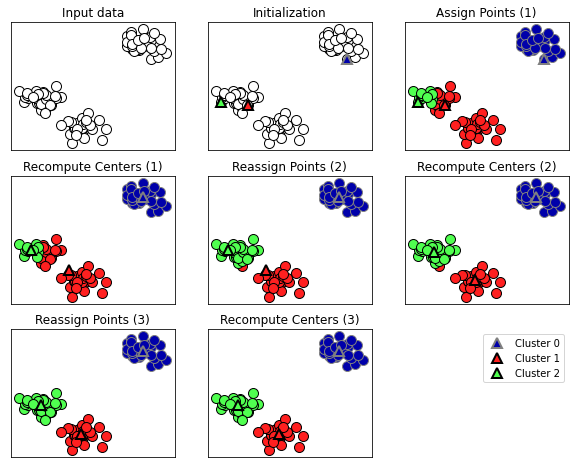

In [44]:
mglearn.plots.plot_kmeans_algorithm()

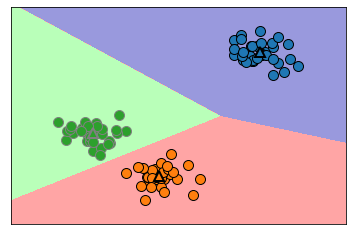

In [45]:
mglearn.plots.plot_kmeans_boundaries()

In [46]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 合成二次元データを作る。
X, y = make_blobs(random_state=1)

# クラスタリングモデルを作る
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [47]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


In [48]:
print(kmeans.predict(X))

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


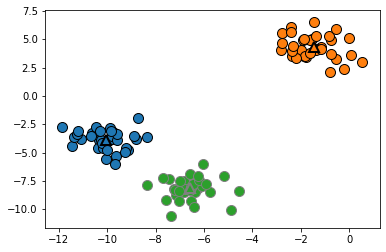

In [49]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], [0,1,2],
                         markers='^', markeredgewidth=2)

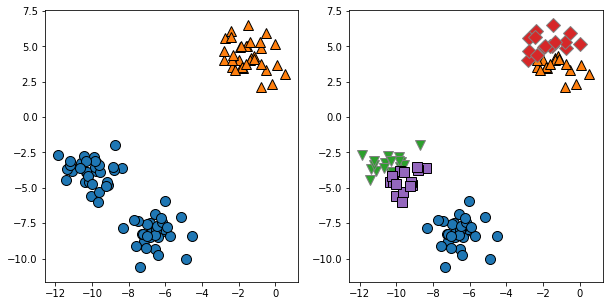

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# クラスタセンタを2つに指定
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:,0], X[:,1], assignments, ax=axes[0])

# クラスタセンタを5つに指定
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:,1], assignments, ax=axes[1])

### 3.5.1.1 k-meansがうまくいかない場合

Text(0, 0.5, 'Feature 1')

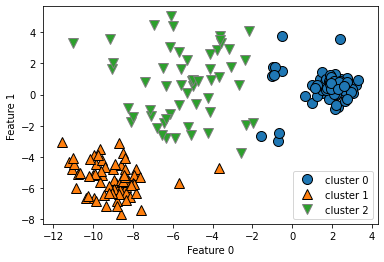

In [51]:
X_varied, y_varied = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:,0], X_varied[:,1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

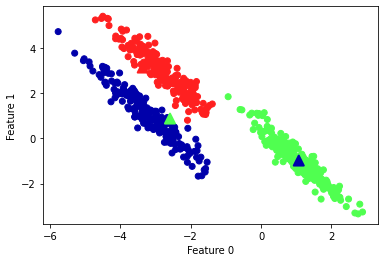

In [52]:
# ランダムにクラスタデータを作成
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 対角線方向に引き伸ばす
transformation = rng.normal(size=(2,2))
X = np.dot(X, transformation)

# データポイントを3つにクラスタリング
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# クラスタ割り当てとクラスタセンタをプロット
plt.scatter(X[:,0], X[:,1], c=y, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            marker='^', c=[0, 1, 2], s=100, linewidth=2, cmap=mglearn.cm3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

k-meanは丸くないクラスタを識別できない

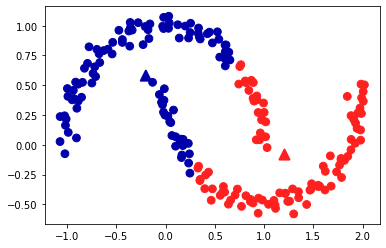

In [53]:
# 合成データセットtwo_moonsデータ作成（今度はノイズ少なめ）
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 2つのクラスタにクラスタ分類
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# クラスタ割り当てとクラスタセンタをプロット
plt.scatter(X[:,0], X[:,1], c=y_pred,cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2)

k-meansは複雑な形状に対してはうまく機能しない。

### 3.5.1.2 ベクトル量子化、もしくは成分分解としてのk-means

単一成分で個々のデータポイントを表現する成分分解手法として見る考え方をベクトル量子化と呼ぶ。

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0
)
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmg = np.dot(nmf.transform(X_test), nmf.components_)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


Text(0, 0.5, 'nmf')

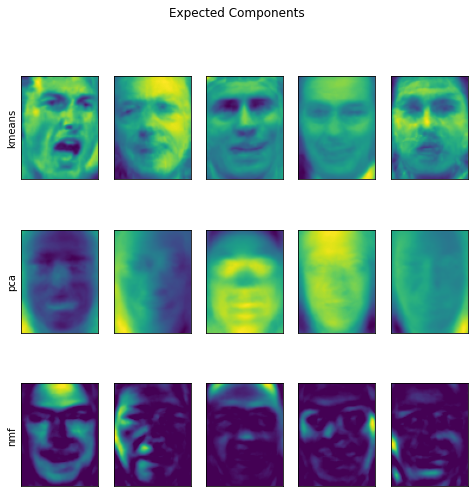

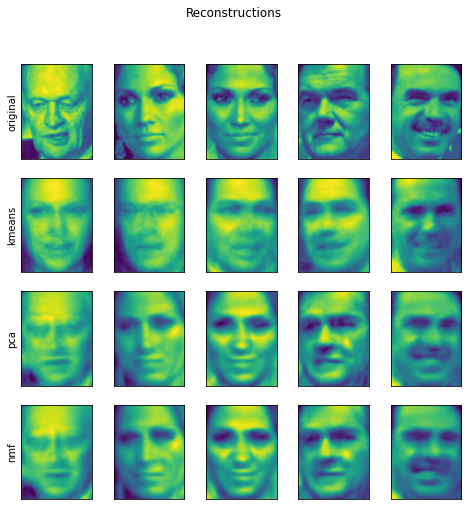

In [55]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8), subplot_kw={'xticks':(), 'yticks':()})
fig.suptitle("Expected Components")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
    axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
  ax[0].imshow(comp_kmeans.reshape(image_shape))
  ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
  ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks':(), 'yticks':()},
                         figsize=(8, 8))
fig.suptitle("Reconstructions")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca, X_reconstructed_nmg):
  ax[0].imshow(orig.reshape(image_shape))
  ax[1].imshow(rec_kmeans.reshape(image_shape))
  ax[2].imshow(rec_pca.reshape(image_shape))
  ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")

Cluster memberships:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


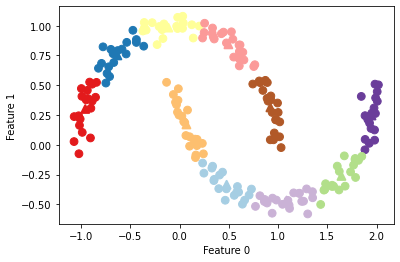

In [56]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
            marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Cluster memberships:\n{}".format(y_pred))

In [57]:
distance_features = kmeans.transform(X)
print("Distance feature shape: {}".format(distance_features.shape))
print("Distance features:\n{}".format(distance_features))

Distance feature shape: (200, 10)
Distance features:
[[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


## 3.5.2 凝集型クラスタリング

凝集型クラスタリング：ある原則に基づく一連のクラスタリングアルゴリズム。  
個々のデータポイントをそれぞれ個別のクラスタとして開始し、最も類似した2つのクラスタを併合し、終了条件が満たされるまで繰り返す。  
scikit-learnではクラスタの数である。  
類似度合いを表す連結度は以下の3つ：  
- ward：デフォルト。併合した際にクラスタ内の分散の増減が最小になるようにクラスタを選択する。
- average：クラスタ間の全てのポイント間の距離の平均値が最小の２クラスタを併合する。
- complete：2つのクラスタの点間の距離の最大値が最小となるものを併合する。

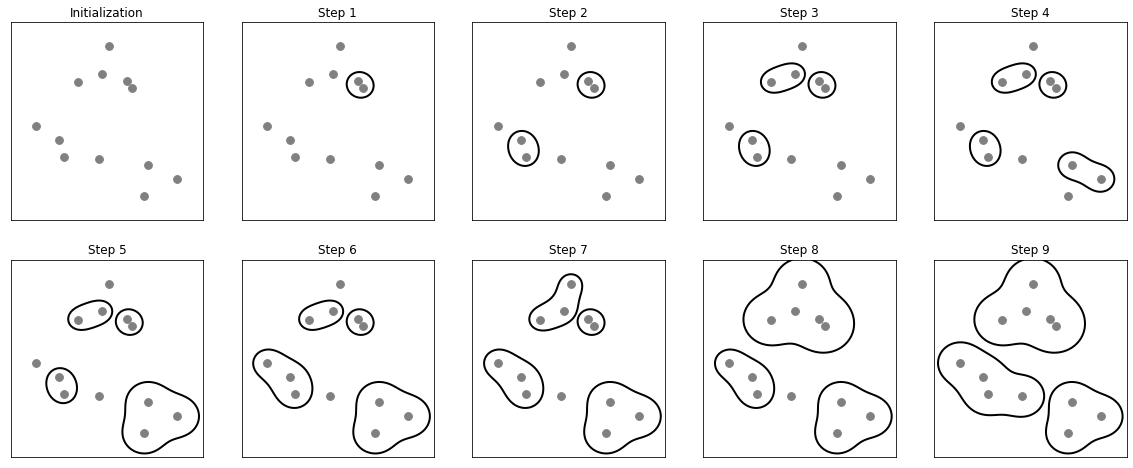

In [58]:
mglearn.plots.plot_agglomerative_algorithm()

Text(0, 0.5, 'Feature 1')

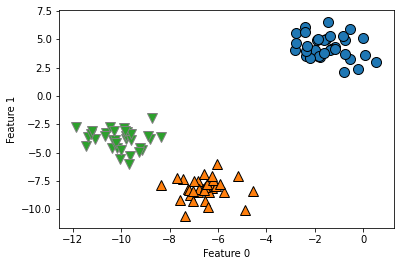

In [59]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:,0], X[:,1], assignment)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### 3.5.2.1 階層型クラスタリングとデンドログラム

凝集型クラスタリングを行うと、階層型クラスタリングが行われる。  

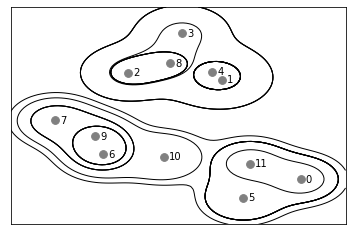

In [60]:
mglearn.plots.plot_agglomerative()

階層型クラスタリングを可視化するには、デンドログラムと呼ばれるもう一つの方法がある。  
Scipyはデータ配列Xを取り、連結性配列を計算する関数を提供する。  
連結性配列には、階層的なクラスタの類似度がエンコードされている。

Text(0, 0.5, 'Cluster distance')

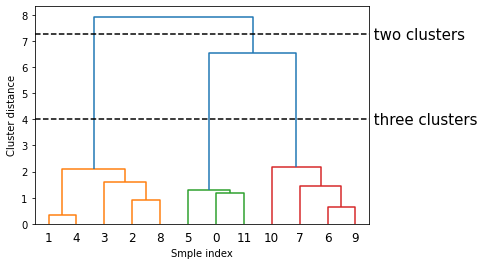

In [61]:
# Scipyからデンドログラム関数とwardクラスタリング関数をインポート
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)
# wardクラスタリングをデータ配列Xに適用
# Scipyのward関数は凝集型クラスタリングを行った際の
# ブリッジ距離を示す配列を示す。
linkage_array = ward(X)
# このlinkage_arrayに書かれたクラスタ間距離をデンドログラムとしてプロットする
dendrogram(linkage_array)

# ２クラスタと３クラスタの部分での切断を表示
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds,[4,4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Smple index")
plt.ylabel("Cluster distance")

デンドログラムのy軸は凝集型クラスタリングアルゴリズムがいつ2つのクラスタを併合したかを示している。

## 3.5.3 DBSCAN

DBSCAN：もう一つの非常に有用なクラスタリングアルゴリズム
密度に基づくノイズあり空間クラスタリング
利点：
- ユーザがクラスタ数を先験的に与える必要がない
- どのクラスタにも属さない点を判別できる
- k-meansより遅いが、比較的大きなデータセットに適用できる  

特徴空間において、多くのてんが近接しているような「混んでいる」領域に属する点を見つける。このような領域を特徴空間の高密度領域と呼ばれる。

高密度領域の中にあるデータポイントはコアサンプルと呼ばれる。  
あるデータポイントから距離eps以内にmin_samples以上のデータポイントがある場合に、そのデータポイントはコアサンプルとなる。eps以内にあるコアサンプルは同じクラスタに割り当てられる。

アルゴリズム
1. 適当な1つのデータポイントを見つける。  
2. そのデータポイントから距離eps以内にある全てのデータポイントを見つける。
3. その数がmin_samples以下であれば、その点はどのクラスタにも属さないノイズとなる。  
4. 距離eps以内にmin_samples以上のデータポイントがあれば、その点はコアサンプルとなり、新しいクラスタラベルが割り当てられる。  
5. eps以内にある全ての近傍点をテストし、それらの点がまだクラスタに割り当てられていなければ、今作ったクラスタラベルを割り当てる。
6. クラスタからeps以内にコアサンプルが存在しなくなるまで続ける。  

最終的には三種類のデータポイントができる。
- コアポイント
- コアポイントから距離eps以内にあるデータポイント
- ノイズ  
境界ポイントがどのクラスタに属するかは、テストされるデータポイントの順番によって変わるが、多くの場合は境界ポイントはごく僅かなので問題にならない。

In [62]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


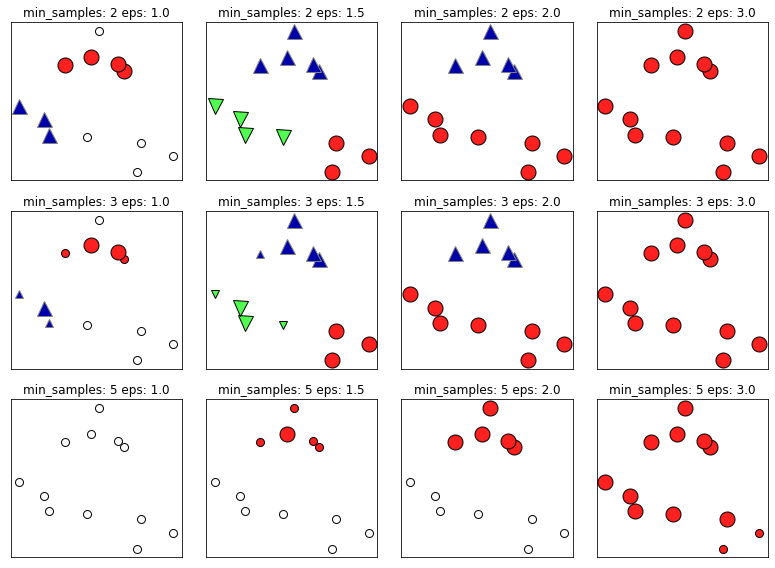

In [63]:
mglearn.plots.plot_dbscan()

min_samplesの設定は、密度が低い領域にあるデータポイントが、外れ値となるか、独自のクラスタになるかに影響する。min_samplesを大きくすると、min_samples以下のデータポイントしか持たないクラスタは全てノイズとなる。従って、min_samplesは最小のクラスタのサイズを決定することになる。

Text(0, 0.5, 'Feature 1')

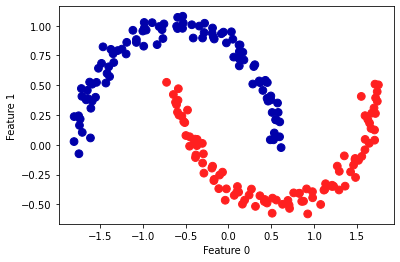

In [64]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# データを平均０分散１にスケール変換
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# クラスタリング結果をプロット
plt.scatter(X_scaled[:, 0], X[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## 3.5.4 クラスタリングアルゴリズムの比較と評価

### 3.5.4.1 正解データを用いたクラスタリングの評価

クラスタリングの出力を正解データクラスタリングと比較して評価する指標  
- 調整ランド指数
- 正規化相互情報量  
これらはいずれも定量的な指標で最良の場合に１を関係ないクラスタリングの場合に０を取る。

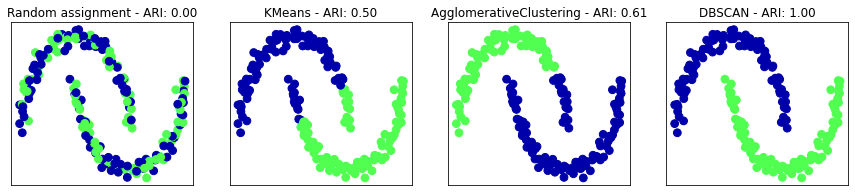

In [65]:
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# データを平均0、分散を1にスケール変換する
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                          subplot_kw={'xticks': (), 'yticks': ()})

#　利用するアルゴリズムのリストをつくる
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),DBSCAN()]

# 参照のためにランダムなクラスタ割り当てを作る
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# ランダムな割り当てをプロット
axes[0].scatter(X_scaled[:,0], X_scaled[:,1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
  # クラスタ割り当てとクラスタセンタをプロット
  clusters = algorithm.fit_predict(X_scaled)
  ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
  ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                         adjusted_rand_score(y, clusters)))

クラスタラベルが正解データに一致しているかではなく、クラスタにどのデータポイントが含まれているかを検証する必要がある。

In [66]:
from sklearn.metrics import accuracy_score

# この2つのラベルは、同じクラスタリングを表している
clusters1 = [0,0,1,1,0]
clusters2 = [1,1,0,0,1]
# 精度はゼロになる。ラベルは全く一致していないため。
print("Accuracy: {:.2f}".format(accuracy_score(clusters1, clusters2)))
# ARIスコアは１になる。クラスタリングは同じため。
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

Accuracy: 0.00
ARI: 1.00


### 3.5.4.2 正解データを用いないクラスタリングの評価

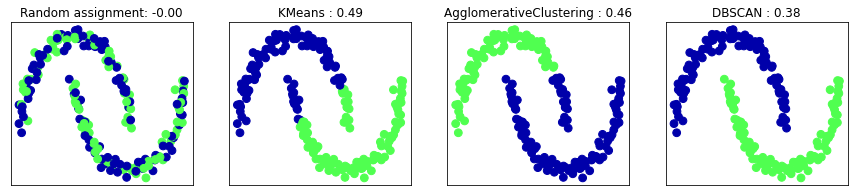

In [67]:
# シルエットスコア（うまくいかないことが多い）
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# データを平均０分散１にスケール変換する
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# 参照のためにランダムなクラスタ割り当てを作る
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# ランダムな割り当てをプロット
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
  clusters = algorithm.fit_predict(X_scaled)
  # クラスタ割り当てとクラスタセンタをプロット
  ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
  ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__, silhouette_score(X_scaled, clusters)))

### 3.5.4.3 顔画像データセットを用いたアルゴリズムの比較

In [68]:
# lfwデータから固有顔を抽出し、変換する
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)

In [69]:
# デフォルト設定でDBSCANを適用する
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1]


In [70]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1]


In [71]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1  0]


In [72]:
# クラスタとノイズのデータポイント数を数える
# bitcountは、負の数を許さないので、全てに１を加える
# 結果の最初の数がノイズのデータポイント数に対応する
print("Number of points per cluster: {}".format(np.bincount(labels + 1)))

Number of points per cluster: [  32 2031]


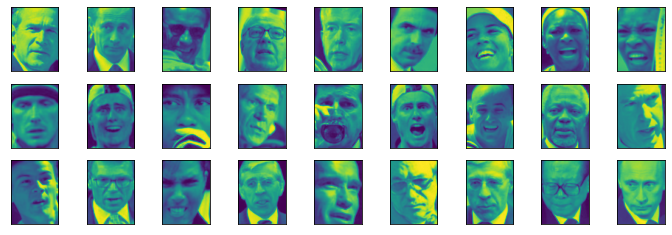

In [73]:
noise = X_people[labels==-1]
fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(12, 4))
for image, ax in zip(noise, axes.ravel()):
  ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

このような何かおかしいものを見つける解析を外れ値検出と呼ぶ

In [74]:
for eps in [1, 3, 5, 7, 9, 11, 13]:
  print("\neps={}".format(eps))
  dbscan = DBSCAN(eps=eps, min_samples=3)
  labels = dbscan.fit_predict(X_pca)
  print("Clusters present: {}".format(np.unique(labels)))
  print("Cluster sizes: {}".format(np.bincount(labels + 1)))


eps=1
Clusters present: [-1]
Cluster sizes: [2063]

eps=3
Clusters present: [-1]
Cluster sizes: [2063]

eps=5
Clusters present: [-1]
Cluster sizes: [2063]

eps=7
Clusters present: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12]
Cluster sizes: [2004    3   14    7    4    3    3    4    4    3    3    5    3    3]

eps=9
Clusters present: [-1  0  1  2]
Cluster sizes: [1307  750    3    3]

eps=11
Clusters present: [-1  0]
Cluster sizes: [ 413 1650]

eps=13
Clusters present: [-1  0]
Cluster sizes: [ 120 1943]


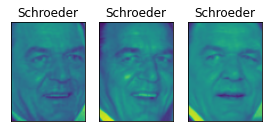

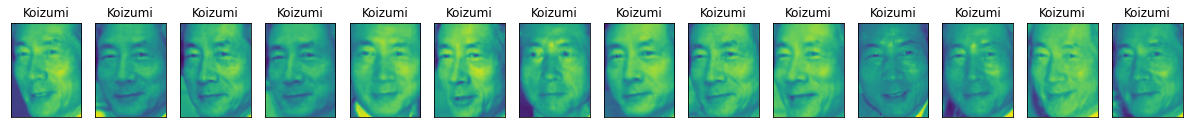

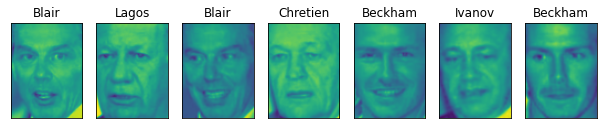

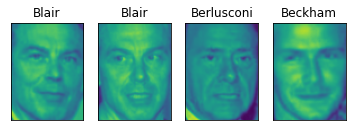

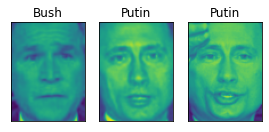

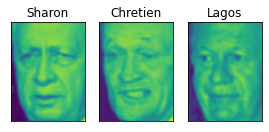

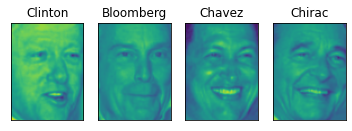

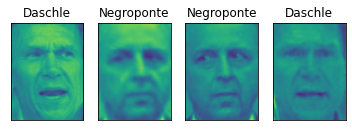

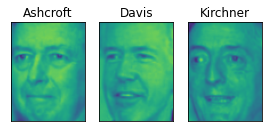

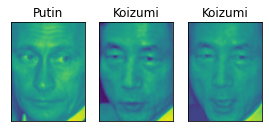

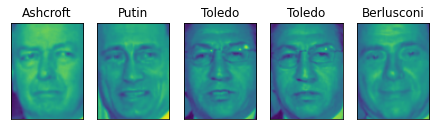

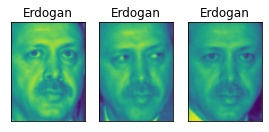

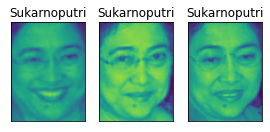

In [75]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
  mask = labels == cluster
  n_images = np.sum(mask)
  fig, axes = plt.subplots(1, n_images, figsize=(n_images * 1.5, 4),
                           subplot_kw={'xticks': (), 'yticks': ()})
  for image, label, ax in zip(X_people[mask], y_people[mask], axes):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
    ax.set_title(people.target_names[label].split()[-1])

顔画像データセットのk-meansによる解析

In [76]:
# k-meansでクラスタ抽出
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)
print("Cluster sizes k-means: {}".format(np.bincount(labels_km)))

Cluster sizes k-means: [155 175 238  75 358 257  91 219 323 172]


In [77]:
labels_km.shape

(2063,)

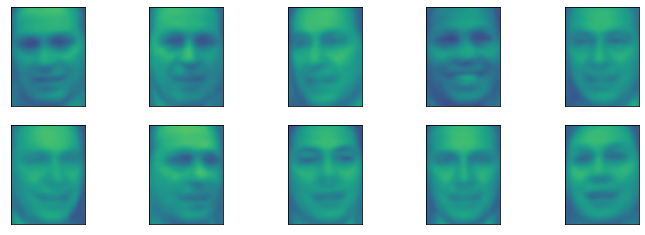

In [78]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(12, 4))
for center, ax in zip(km.cluster_centers_, axes.ravel()):
  ax.imshow(pca.inverse_transform(center).reshape(image_shape),vmin=0, vmax=1)

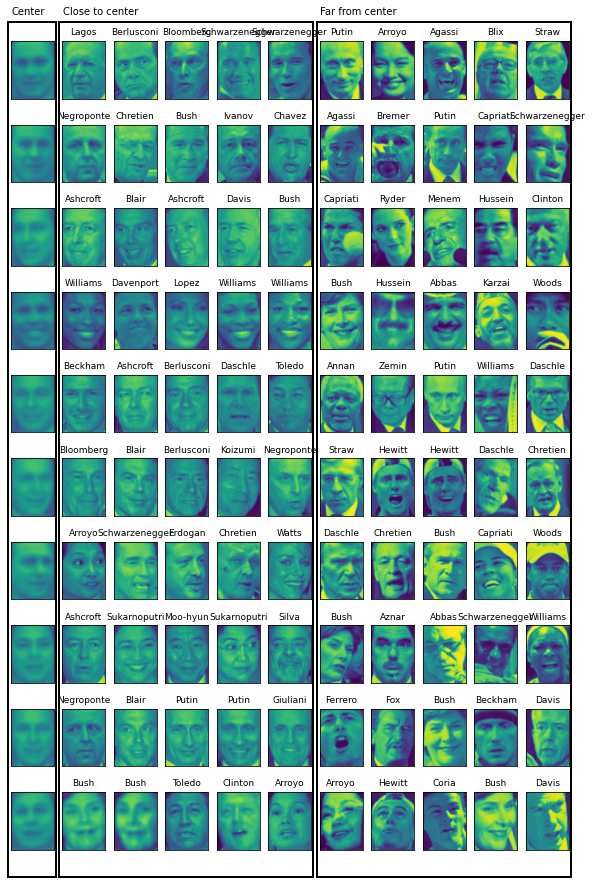

In [79]:
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people, y_people, people.target_names)

凝集型クラスタリングによる顔画像データセットの解析

In [80]:
# ward凝集型クラスタリングでクラスタを抽出
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print("Cluster sizes agglomerative clustering: ()".format(np.bincount(labels_agg)))

Cluster sizes agglomerative clustering: ()


In [81]:
print("ARI: {:.2f}".format(adjusted_rand_score(labels_agg, labels_km)))

ARI: 0.09


Text(0, 0.5, 'Cluster distance')

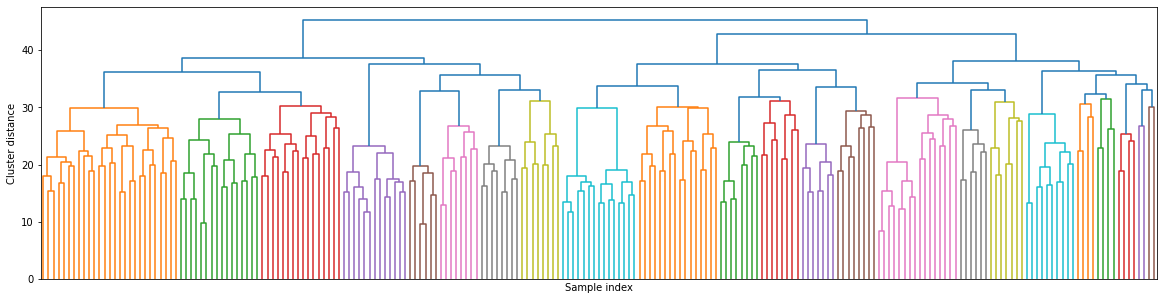

In [82]:
linkage_array = ward(X_pca)
# このlinkage_arrayに書かれたクラスタ間距離をデンドログラムとしてプロットする
plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

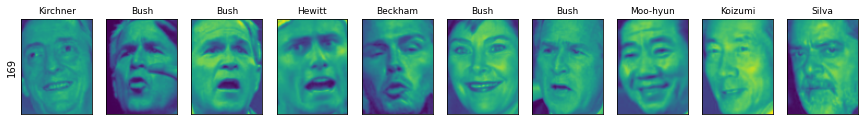

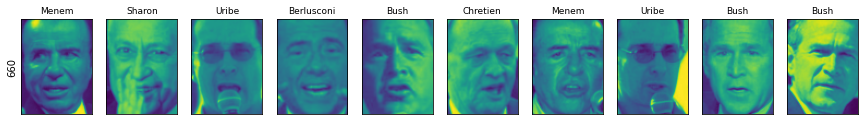

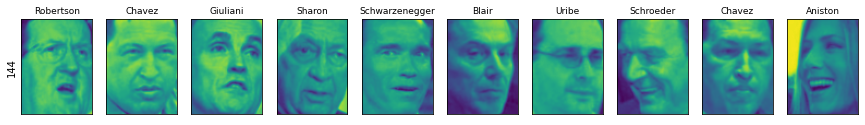

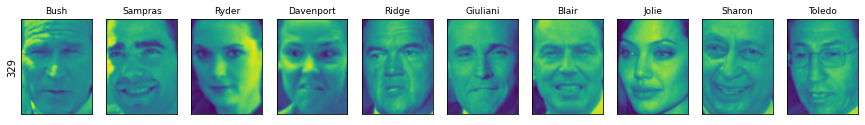

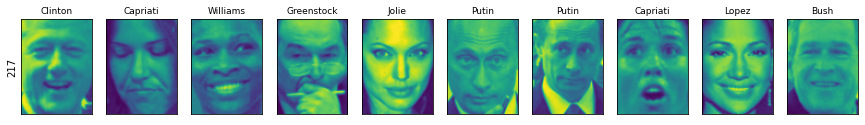

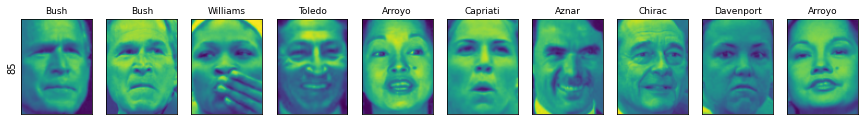

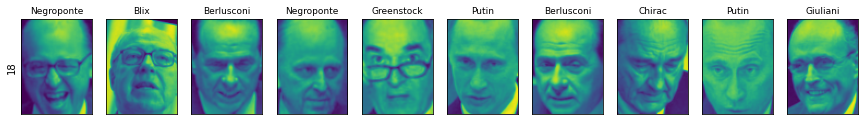

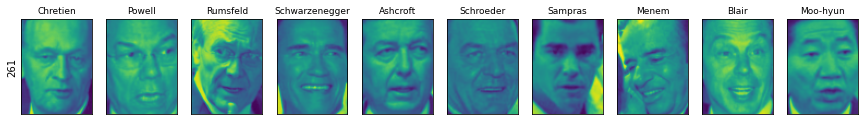

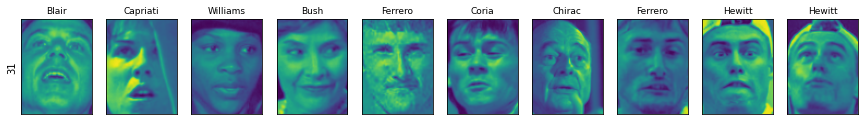

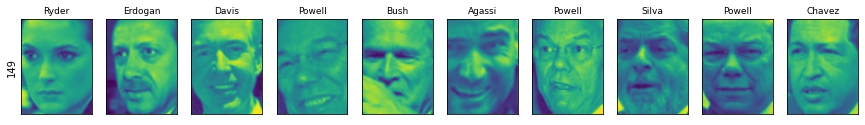

In [84]:
n_clusters = 10
for cluster in range(n_clusters):
  mask = labels_agg == cluster
  fig, axes = plt.subplots(1, 10, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(15, 8))
  axes[0].set_ylabel(np.sum(mask))
  for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
                                    labels_agg[mask], axes):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
    ax.set_title(people.target_names[label].split()[-1],fontdict={'fontsize':9})

cluster sizes agglomerative clustering: ()


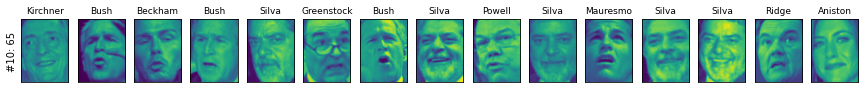

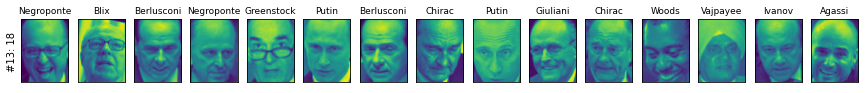

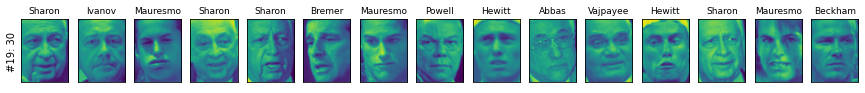

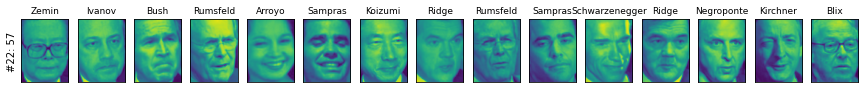

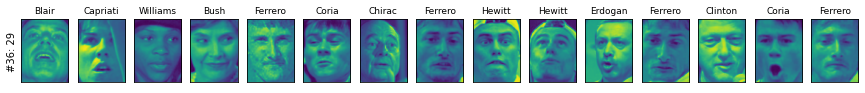

In [87]:
# ward凝集型クラスタリングでクラスタを抽出
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print("cluster sizes agglomerative clustering: ()".format(np.bincount(labels_agg)))

n_clusters = 40
for cluster in [10, 13, 19, 22, 36]:
  mask = labels_agg == cluster
  fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(15, 8))
  cluster_size = np.sum(mask)
  axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))
  for image, label, asdf, ax in zip(X_people[mask], y_people[mask], labels_agg[mask], axes):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
    ax.set_title(people.target_names[label].split()[-1], fontdict={'fontsize': 9})
  for i in range(cluster_size, 15):
    axes[i].set_visible(False)